# Building abstractions with classes

It's quite hard to build universal code.

Let's first start with `Plot` class.
From user perspective this object should be able to:
- add multiple elements to the axes
- return the figure that we can display, modify or save

In [1]:
from matplotlib import pyplot as plt


class Plot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()

    def add(self, objs, param_dict=None):
        # We are implementing simpler version of seaborn plot function
        # https://github.com/mwaskom/seaborn/blob/9bdfc7484c15894dd35d58d3f16475389dfe4fe5/seaborn/_core/plot.py#L484
        # https://matplotlib.org/stable/users/explain/quick_start.html#making-a-helper-functions
        if param_dict is None:
            param_dict = {}
        if not isinstance(objs, (list, tuple)):
            objs = [objs]  # Convert single object to a list with single element
        for obj in objs:
            obj.plot(self.ax, param_dict)
        return self

    def get_figure(self):
        return self.fig, self.ax

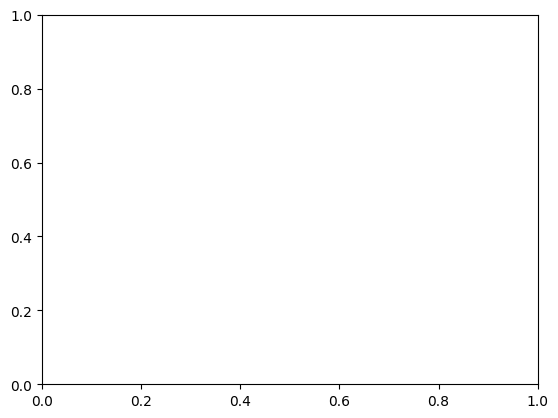

In [2]:
fig, ax = Plot().get_figure()

In [3]:
from rich import print

In [4]:
print(f"The figure and axes have the following ID's: {id(fig)=}, {id(ax)=}")

The figure and axes have the following ID's: id(fig)=4363024144, id(ax)=4589573216

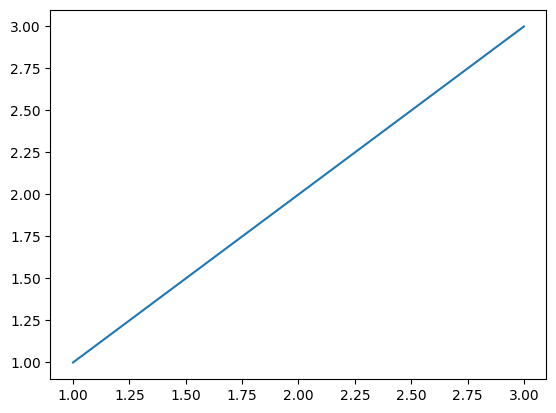

In [5]:
ax.plot([1, 2, 3], [1, 2, 3])
fig.get_figure()

In [6]:
print(f"The figure and axes have the following ID's: {id(fig)=}, {id(ax)=}")

The figure and axes have the following ID's: id(fig)=4363024144, id(ax)=4589573216

Next, let's create an abstraction for a `Point` class.

In [7]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def __str__(self):
        return f"Point({self.x}, {self.y})"

    def plot(self, ax, kwargs):
        # Use default Matplotlib arguments if kwargs is not provided
        default_kwargs = {"marker": "o", "linestyle": "None", "color": "b"}
        for key, value in default_kwargs.items():
            kwargs.setdefault(key, value)

        ax.plot(self.x, self.y, **kwargs)

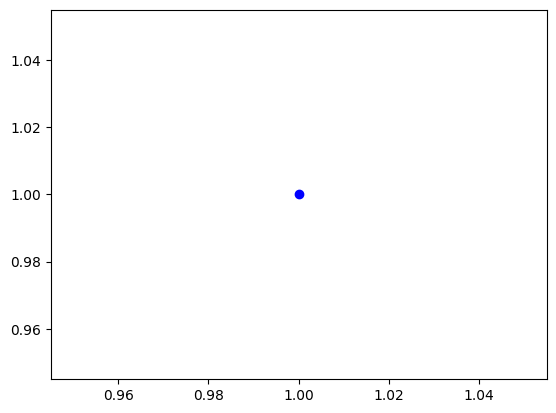

In [8]:
fig, ax = Plot().add(Point(1, 1)).get_figure()

It's useful to have a flexibility to change the style of the point.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

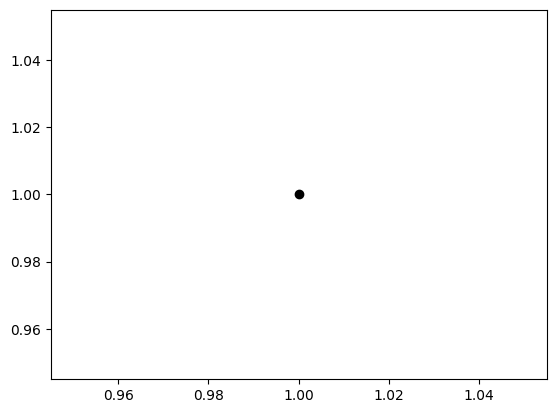

In [9]:
point_style = {"marker": "o", "color": "black"}
Plot().add(Point(1, 1), point_style).get_figure()

In [10]:
def update_dict(d: dict, kwargs: dict) -> dict:
    updated_dict = dict(d)
    updated_dict.update(kwargs)
    return updated_dict


point_style = {"marker": "o", "color": "black"}

print(
    f"""
{point_style=}
{update_dict(point_style, {'alpha': 0.5, 'color': 'red'})=}
"""
)

point_style={'marker': 'o', 'color': 'black'}
update_dict(point_style, {'alpha': 0.5, 'color': 'red'})={'marker': 'o', 'color': 'red', 'alpha': 0.5}

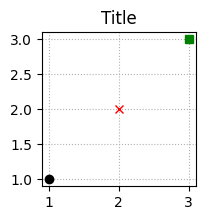

In [11]:
fig, ax = (
    Plot()
    .add(Point(1, 1), point_style)
    .add(Point(2, 2), update_dict(point_style, {"marker": "x", "color": "red"}))
    .add(Point(3, 3), {"marker": "s", "color": "green"})
    .get_figure()
)

fig.set_size_inches(2, 2)
ax.set_title("Title")
ax.set_aspect("equal")
ax.grid(True, linestyle=":")

## Vector

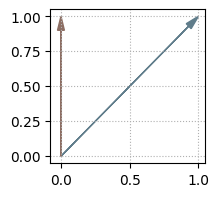

In [12]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.arrow(
    x=0,
    y=0,
    dx=1,
    dy=1,
    head_width=0.05,
    head_length=0.1,
    fc="#607D8B",
    ec="#607D8B",
    length_includes_head=True,
)
ax.grid(True, linestyle=":")

# or we can define a vector using points
origin = Point(0, 0)
tip = Point(0, 1)
ax.arrow(
    origin.x,
    origin.y,
    tip.x,
    tip.y,
    head_width=0.05,
    head_length=0.1,
    fc="#8D6E63",
    ec="#8D6E63",
    length_includes_head=True,
)

# Exercise 1

Implement a `Vector` class that will represent a vector in 2D space. With `plot` method similar to `Point` class.

* A class should have a constructor `__init__(self, ...)`
* A class should have a method `__str__(self)` that will return a string representation of the object
* A class should have a method `plot(self, ax, kwargs)` that will plot the vector on the axes

This could be a difficult task if you've never worked with classes before.
If it is, could you find a source code from `chapter_2_0.ipynb` and improve your debugging skills?

In [13]:
# TODO: Implement Vector class here

Now let's implement a Polygon class, that will plot a closed shape represented by a list of points.

In [14]:
class Polygon:
    def __init__(self, points):
        self.points = points

    def __str__(self):
        return f"Polygon({self.points})"

    def plot(self, ax, kwargs):
        xs = [point.x for point in self.points]
        ys = [point.y for point in self.points]
        ax.fill(xs, ys, **kwargs)

After we are done with this we have everything we need to plot a dinosaur form previous chapter.

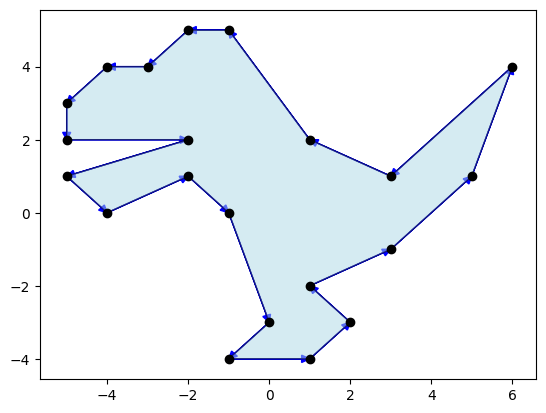

In [15]:
from abstractions import Vector

dino_vectors = (
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
)

grid_points = [Point(x, y) for x, y in dino_vectors]
grid_vectors = [
    Vector(start, end)
    for start, end in zip(grid_points, grid_points[1:] + [grid_points[0]])
]

point_style = {"marker": "o", "color": "black"}
vector_style = {
    "head_width": 0.2,
    "head_length": 0.2,
    "fc": "blue",
    "ec": "blue",
    "length_includes_head": "True",
}
polygon_style = {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}

# the plotting happens here
fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(grid_vectors, vector_style)
    .add(Polygon(grid_points), polygon_style)
    .get_figure()
)

BRAVO!

Four abstractions:
* Plot
* Point
* Vector
* Polygon

And we are able to generate quite a complex figures!
You could also notice that adding new elements to the plot is quite easy.

We can go beyond and add `add_vector` to the `Point` and `Vector` class.

# Exercise 2

Create a Dinosaur without filling it with color.


In [16]:
# TODO: your code here

## Exercise 3

Create a plot of X, Y:

```python
X = np.linspace(-2 * np.pi, +2 * np.pi, 500)
Y = np.sin(X) + 0.4 * np.cos(3 + 5 * X)
```

bonus, after you done. Add this to modify your axes:
```python
cmap = plt.cm.viridis
ax.get_children()
colors = np.linspace(0, 1, len(X))
for i, child in enumerate(ax.get_children()):
    # Check if the child is an instance of matplotlib.lines.Line2D
    if isinstance(child, plt.Line2D):
        # Set the color of the line using the colormap
        child.set_color(cmap(colors[i]))
```

This is quite an advanced Matplotlib concept that you could use in your daily work.

In [17]:
# TODO: your code here

The result should look like this:

<img src="./results/ex_2_3.png" width="1200">


## More Dinosaurs

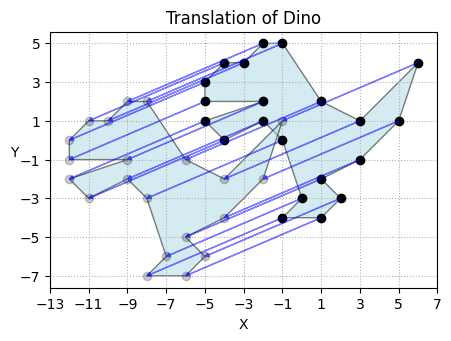

In [18]:
from abstractions import Vector, Point, Polygon

dino_vectors = (
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
)

grid_points = [Point(x, y) for x, y in dino_vectors]
grid_vectors = [
    Vector(start, end)
    for start, end in zip(grid_points, grid_points[1:] + [grid_points[0]])
]

translation_vector = Vector(Point(0, 0), Point(-7, -3))


fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(Polygon(grid_points), polygon_style)
    .add(
        [point.add_vector(translation_vector) for point in grid_points],
        update_dict(point_style, {"alpha": 0.2}),
    )
    .add(
        Polygon([point.add_vector(translation_vector) for point in grid_points]),
        polygon_style,
    )
    .add(
        [
            Vector(original, translated)
            for original, translated in zip(
                grid_points,
                [point.add_vector(translation_vector) for point in grid_points],
            )
        ],
        update_dict(
            vector_style,
            {
                "alpha": 0.5,
                "head_width": 0.2,
                "head_length": 0.2,
                "length_includes_head": "True",
                "zorder": 10,
            },
        ),
    )
    .get_figure()
)

fig.set_size_inches((5, 5))
ax.set_aspect("equal")
ax.set_title("Translation of Dino")
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.grid(True, linestyle=":")
ax.set_xticks(range(-13, 8, 2))
ax.set_yticks(range(-7, 7, 2))

fig.savefig("results/translation_of_dino.svg")
# fig.get_figure()

The approach of abstractions is very powerful and can be used in many different ways.
However, you could find it overwhelming at the beginning.
But don't give up, you could abstract common code into a functions, instad of classes and benefit from the same advantages.

# Building abstractions with functions

Let's get back to the common chart example that we've built in the previous chapter.

<img src="./results/common_chart_xkcd.png" width="1200">

There are a number of steps we did that are chart agnostic:
* Adding labels to lines
* Despining the axis
* Removing ticks
* Adding arrows to the axis

All of these steps could be abstracted into functions.

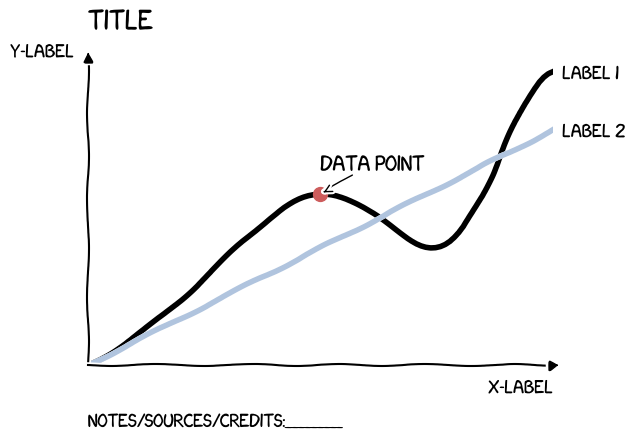

In [19]:
import numpy as np

def add_labels_to_lines(
    axis: plt.Axes, label: str, x_delta: float = 0.02, y_delta: float = 0
) -> plt.Axes:
    for line in axis.lines:
        if line.get_label().startswith(label):
            latest_x, latest_y = line.get_data()

    axis.text(
        latest_x[-1] + x_delta,
        latest_y[-1] + y_delta,
        label,
        ha="left",
        va="center",
        fontsize=12,
    )

    return axis


def despine(axis: plt.Axes, which_spines: list = ["top", "right"]) -> plt.Axes:
    return axis.spines[which_spines].set_visible(False)


def remove_ticks(axis: plt.Axes) -> plt.Axes:
    axis.tick_params(axis="both", which="both", length=0)
    axis.set_xticks([])
    axis.set_yticks([])
    return axis


def add_arrows_to_axis(axis: plt.Axes) -> plt.Axes:
    xmin, xmax = axis.get_xlim()
    ymin, ymax = axis.get_ylim()
    axis.plot(
        xmin,
        ymax,
        "^k",
        transform=axis.get_yaxis_transform(),
        clip_on=False,
        zorder=10,
        label="y_arrow",
    )
    axis.plot(
        xmax,
        ymin,
        ">k",
        transform=axis.get_xaxis_transform(),
        clip_on=False,
        zorder=10,
        label="x_arrow",
    )
    return axis


def plot_common_chart() -> plt.Figure:
    def y(x):
        return x + np.sin(x * x * 8) / 4
    
    fig, ax = plt.subplots(figsize=(6, 4))

    ax.set_title("Title", loc="left", fontweight="bold", fontsize=18, pad=20)

    ax.set_ylabel(
        "y-label", fontsize=12, labelpad=10, rotation=0, loc="top", fontstyle="italic"
    )
    ax.set_xlabel("x-label", fontsize=12, labelpad=10, loc="right", fontstyle="italic")

    x = np.linspace(0, 1, 100)
    ax.plot(x, y(x), linewidth=4, color="black", label="label 1")
    ax.plot(x, x, linewidth=4, color="lightsteelblue", label="label 2")

    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0, right=1)

    ax.scatter(0.5, y(0.5), s=100, color="indianred", zorder=10)
    ax.annotate(
        "Data Point",
        xy=(0.5, y(0.5)),
        xytext=(0.5, y(0.5) + 0.1),
        arrowprops=dict(arrowstyle="->"),
        zorder=11,
    )

    add_labels_to_lines(ax, "label 1")
    add_labels_to_lines(ax, "label 2")
    despine(ax)
    add_arrows_to_axis(ax)
    remove_ticks(ax)

    ax.text(
        x=0,
        y=-0.2,
        s="Notes/Sources/Credits:_________",
        fontsize=12,
        ha="left",
        transform=ax.transAxes,
    )

    return fig


with plt.xkcd():
    plot_common_chart()

There are still more things to be simplified, but it's already good, because if I would need to repeat this operation in other plot. I'm equipped with a function that will do it for me.

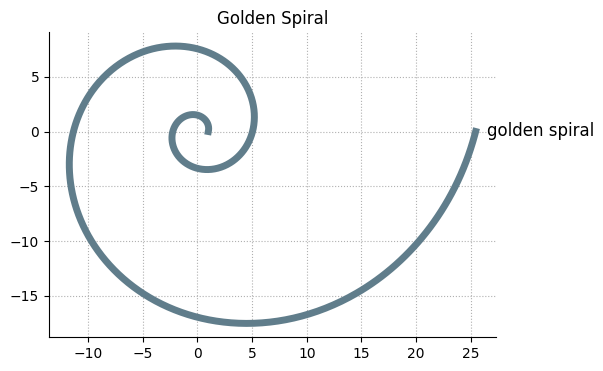

In [20]:
# Define the golden ratio
phi = (1 + np.sqrt(5)) / 2

# Define the number of points on the spiral
num_points = 1000

# Define the maximum radius of the spiral
max_radius = 1.0

# Generate theta values from 0 to 4*pi
theta = np.linspace(0, 4 * np.pi, num_points)

# Calculate the radii for each theta value using the golden ratio
radii = max_radius * np.exp(phi * theta / (2 * np.pi))

# Calculate the x and y coordinates using polar to Cartesian conversion
x = radii * np.cos(theta)
y = radii * np.sin(theta)

# Plot the golden spiral
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, color="#607D8B", linewidth=5, label="golden spiral")
ax.set_title("Golden Spiral")
ax.set_aspect("equal")
ax.grid(True, linestyle=":")

despine(ax)
add_labels_to_lines(ax, "golden spiral", x_delta=1, y_delta=0.02)
fig.tight_layout()
# remove_ticks(ax)

And packing your plot in a function is also a good idea, because you can easily play with different styles.

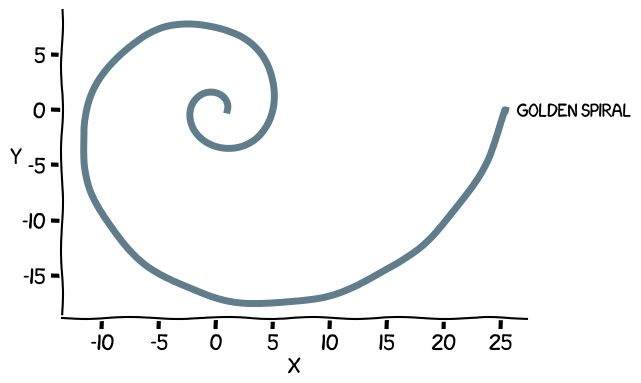

In [21]:
def plot_golden_spiral() -> plt.Figure:
    # Define the golden ratio
    phi = (1 + np.sqrt(5)) / 2
    
    # Define the number of points on the spiral
    num_points = 1000
    
    # Define the maximum radius of the spiral
    max_radius = 1.0
    
    # Generate theta values from 0 to 4*pi
    theta = np.linspace(0, 4 * np.pi, num_points)
    
    # Calculate the radii for each theta value using the golden ratio
    radii = max_radius * np.exp(phi * theta / (2 * np.pi))
    
    # Calculate the x and y coordinates using polar to Cartesian conversion
    x = radii * np.cos(theta)
    y = radii * np.sin(theta)
    
    fig, ax = plt.subplots(figsize=(6, 4))

    ax.plot(x, y, color="#607D8B", linewidth=5, label="golden spiral")

    return fig


with plt.xkcd():
    fig = plot_golden_spiral()
    ax = fig.get_axes()[0]
    ax.set_xlabel("X")
    ax.set_ylabel("Y", rotation=0)
    add_labels_to_lines(ax, "golden spiral", x_delta=1, y_delta=0.02)
    despine(ax)

# Exercise 4

Reproduce this plot:

<img src="./results/ex_2_4.png" width="1200">



In [22]:
# TODO: your code here

# Exercise 5*

Reproduce this plot:

<img src="./results/ex_2_5.png" width="1200">



In [23]:
# TODO: your code here

# Exercise 6*

Reproduce this plot:

<img src="./results/ex_2_6.png" width="1200">


In [24]:
# TODO: your code here

# Exercise 7*

Reproduce this plot:

<img src="./results/ex_2_7.png" width="1200">



# Conclusion

TODO finish this workshop: https://realpython.com/mandelbrot-set-python/

> Knowing about object-oriented programming principles and recursion will enable you to take full advantage of Python’s expressive syntax to write clean code that reads almost like math formulas. 

also link the refactored anatomy_of_figure